<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Ago25/Ejercicio_Coston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [6]:
x=data[0]
y=data[1]

Text(0, 0.5, 'tiempo ganador')

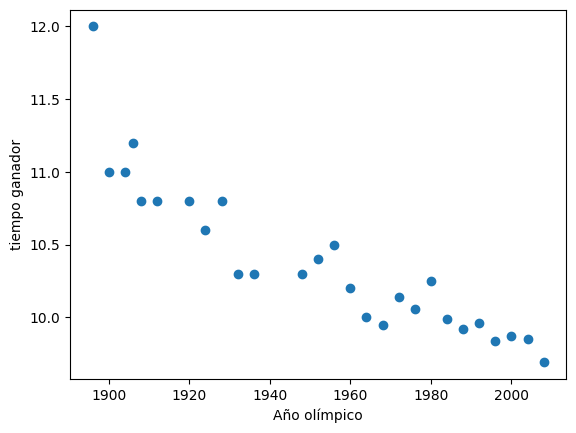

In [7]:
plt.scatter(x,y)
plt.xlabel('Año olímpico')
plt.ylabel('tiempo ganador')

In [273]:
x_exp=np.array([1896., 1904., 1908., 1920., 1928.,
       1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008.])

In [274]:
y_exp=np.array([12, 11. , 10.8 , 10.8 , 10.8
        , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

In [323]:
x_val=np.array([1900., 1906., 1912., 1924., 1932.])

In [324]:
y_val=np.array([ 11., 11.2 , 10.8, 10.6, 10.3])

In [277]:
#Para X de grado n
def w(x,y,n):
  X=np.vstack((np.ones_like(x)))
  i=1
  while i<= n:
    T=x**i
    TT= np.reshape(T,(22,1))
    X=np.hstack((X, TT))
    i+=1
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [278]:
M=w(x_exp,y_exp,3)
M

array([ 2.48073159e+04, -3.78349171e+01,  1.92454136e-02, -3.26366154e-06])

In [279]:
for i in range(np.size(M)):
  if i==0:
    Y=M[0]
  else:
      Y+=M[i]*x_exp**i
Costo=(Y-y_exp)**2
CostoT=(np.sum(Costo))/(np.size(x_exp))
CostoT

0.02712468383941903

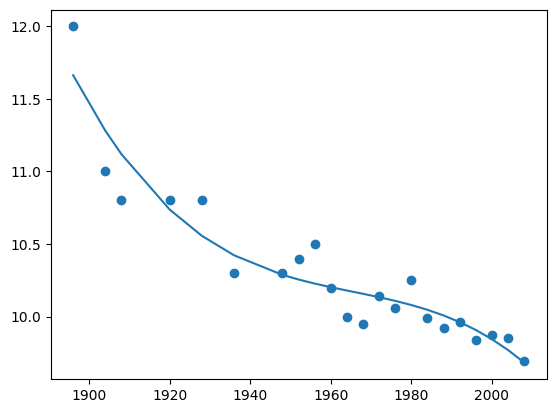

In [281]:
plt.plot(x_exp,Y)
plt.scatter(x_exp,y_exp)

Parte 2

In [328]:
def V(w,y_val,x_val):
  for i in range(np.size(w)):
    if i==0:
      Y=w[0]
    else:
        Y+=w[i]*x_val**i
  Costo=(Y-y_val)**2
  CostoT=(np.sum(Costo))/(np.size(x))
  return CostoT

In [329]:
V(M,y_val,x_val)

0.06057927762473216

In [334]:
n=8
i=0
P=[]
NN=[0,1,2,3,4,5,6,7,8]
while i<=n:
  MM=w(x_exp,y_exp,i)
  Cost = V(MM,y_val,x_val)
  i+=1
  P.append(Cost)

In [251]:
x

array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
       1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008.])

In [252]:
y

array([12.  , 11.  , 11.  , 11.2 , 10.8 , 10.8 , 10.8 , 10.6 , 10.8 ,
       10.3 , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

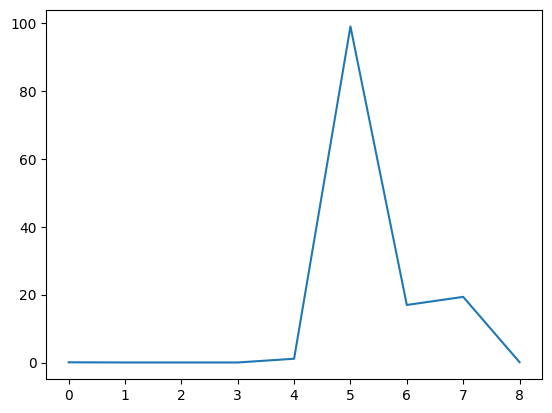

In [335]:
plt.plot(NN,P)

In [337]:
n=8
i=0
P=[]
NN=[0,1,2,3,4,5,6,7,8]
while i<=n:
  MM=w(x_exp,y_exp,i)
  Cost = V(MM,y_exp,x_exp)
  i+=1
  P.append(Cost)

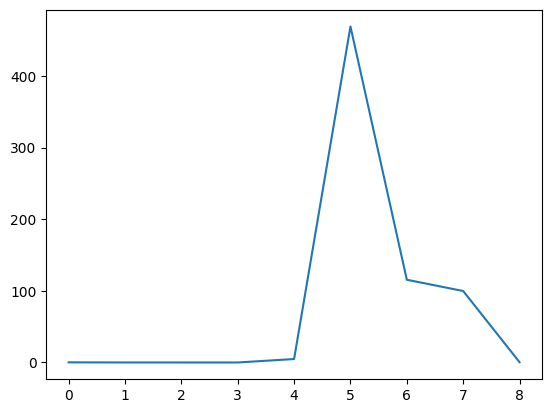

In [338]:
plt.plot(NN,P)

Cross-validation

In [ ]:
def L(w,x,y):
